<a href="https://colab.research.google.com/github/Oumayma-O/TP3_DL/blob/main/Tp3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras import backend as K
K.set_image_data_format('channels_first')
#fix random seed for reproducibility
seed = 7
np.random.seed(seed)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [ ]:
#load data
(X_train, y_train),(X_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display information about the dataset
print("Training set:")
print("Number of examples:", X_train.shape[0])
print("Shape of each example:", X_train.shape[1:])
print("Data type of each pixel:", X_train.dtype)
print("Labels:", y_train.shape)

print("\nTest set:")
print("Number of examples:", X_test.shape[0])
print("Shape of each example:", X_test.shape[1:])
print("Data type of each pixel:", X_test.dtype)
print("Labels:", y_test.shape)


Training set:
Number of examples: 60000
Shape of each example: (28, 28)
Data type of each pixel: uint8
Labels: (60000,)

Test set:
Number of examples: 10000
Shape of each example: (28, 28)
Data type of each pixel: uint8
Labels: (10000,)


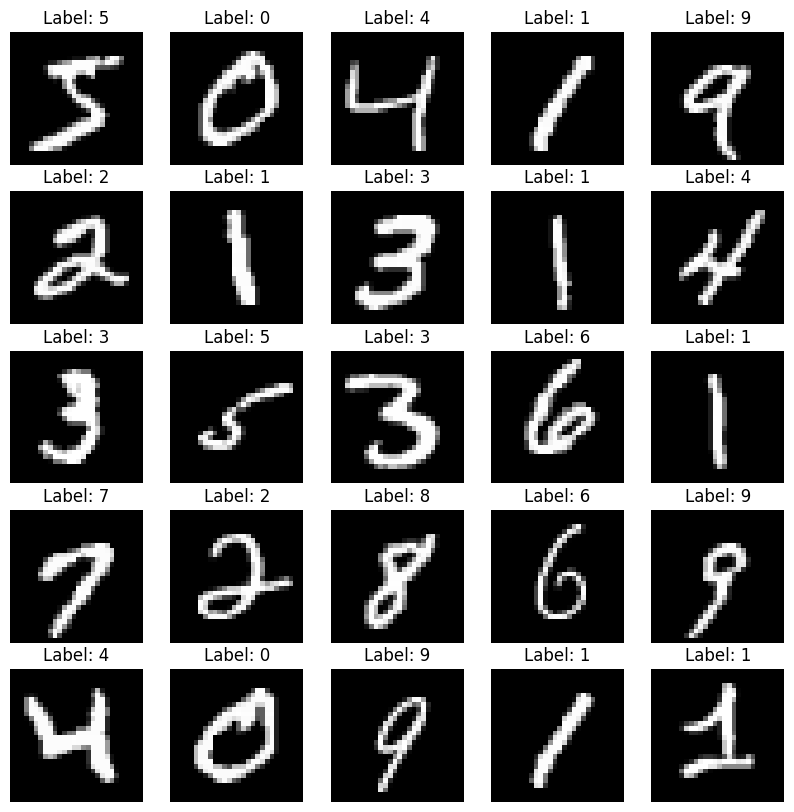

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display a sample of the training data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title('Label: %s' % y_train[i])
    plt.axis('off')
plt.show()


In [ ]:
print( X_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (60000, 1, 28, 28)
Shape of X_test: (10000, 1, 28, 28)


In [ ]:
from keras.utils import to_categorical

# One-hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Get the number of classes
num_classes = y_test.shape[1]



In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

def get_data_mnist():
    # Load MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Reshape and normalize input images
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32') / 255.0
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32') / 255.0

    # One-hot encode outputs
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    # Get the number of classes
    num_classes = y_test.shape[1]

    return (X_train, y_train), (X_test, y_test), num_classes


In [ ]:
# create model
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(1, 28, 28), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
def small_model():
  # create model
  model = Sequential()
  model.add(Conv2D(64, (3, 3), input_shape=(1, 28, 28),activation='relu'))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))
  #compile model
  model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")
  return model

In [ ]:

model = small_model()
(X_train, y_train), (X_test, y_test), num_classes = get_data_mnist()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)


Epoch 1/10
300/300 [==============================] - 9s 16ms/step - loss: 0.2268 - accuracy: 0.9338 - val_loss: 0.0616 - val_accuracy: 0.9810
Epoch 2/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0634 - accuracy: 0.9810 - val_loss: 0.0512 - val_accuracy: 0.9832
Epoch 3/10
300/300 [==============================] - 5s 16ms/step - loss: 0.0442 - accuracy: 0.9865 - val_loss: 0.0440 - val_accuracy: 0.9857
Epoch 4/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0338 - accuracy: 0.9897 - val_loss: 0.0453 - val_accuracy: 0.9845
Epoch 5/10
300/300 [==============================] - 5s 16ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0428 - val_accuracy: 0.9867
Epoch 6/10
300/300 [==============================] - 4s 14ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0456 - val_accuracy: 0.9871
Epoch 7/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0439 - val_accuracy: 0.9861

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0497 - accuracy: 0.9869
Test Loss: 0.04965093359351158
Test Accuracy: 0.9868999719619751


In [ ]:
def print_model_error_rate(model, X_test, y_test):
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    accuracy = scores[1] * 100
    error_rate = 100 - accuracy
    print("Model score: %.2f%%" % accuracy)
    print("Model error rate: %.2f%%" % error_rate)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Evaluate the model and print error rate
print_model_error_rate(model, X_test, y_test)


Epoch 1/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.0562 - val_accuracy: 0.9857
Epoch 2/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0604 - val_accuracy: 0.9860
Epoch 3/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0662 - val_accuracy: 0.9845
Epoch 4/10
300/300 [==============================] - 5s 16ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.0671 - val_accuracy: 0.9849
Epoch 5/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0628 - val_accuracy: 0.9865
Epoch 6/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.0693 - val_accuracy: 0.9859
Epoch 7/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.0758 - val_accuracy: 0.9847
Epoch

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

def get_data_mnist_normalized():
    # Load MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Reshape and normalize input images
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32') / 255.0
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32') / 255.0

    # One-hot encode outputs
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    # Get the number of classes
    num_classes = y_test.shape[1]

    return (X_train, y_train), (X_test, y_test), num_classes


In [ ]:
# Get normalized data
(X_train_normalized, y_train), (X_test_normalized, y_test), num_classes = get_data_mnist_normalized()

# Create and train the model with normalized data
model_normalized = small_model()
history_normalized = model_normalized.fit(X_train_normalized, y_train, validation_data=(X_test_normalized, y_test), epochs=10, batch_size=200)

# Evaluate the model with normalized data
print_model_error_rate(model_normalized, X_test_normalized, y_test)


Epoch 1/10
300/300 [==============================] - 4s 10ms/step - loss: 0.2332 - accuracy: 0.9333 - val_loss: 0.0653 - val_accuracy: 0.9799
Epoch 2/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0652 - accuracy: 0.9802 - val_loss: 0.0556 - val_accuracy: 0.9825
Epoch 3/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0443 - accuracy: 0.9867 - val_loss: 0.0427 - val_accuracy: 0.9856
Epoch 4/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0359 - accuracy: 0.9894 - val_loss: 0.0449 - val_accuracy: 0.9863
Epoch 5/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.0491 - val_accuracy: 0.9846
Epoch 6/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0492 - val_accuracy: 0.9869
Epoch 7/10
300/300 [==============================] - 3s 9ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0455 - val_accuracy: 0.9867
Epoc

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

def medium_CNN(input_shape, num_classes):
    # Create model
    model = Sequential()

    # Convolutional layer with 32 filters of size 5x5 and ReLU activation
    model.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu'))

    # Max pooling layer with pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Dropout layer with dropout rate of 0.2
    model.add(Dropout(0.2))

    # Flatten layer
    model.add(Flatten())

    # Dense layer with 128 units and ReLU activation
    model.add(Dense(128, activation='relu'))

    # Output layer with num_classes units and softmax activation
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Get the shape of input data
input_shape = (1, 28, 28)

# Get the number of classes
num_classes = 10  # MNIST has 10 classes (digits 0-9)

# Build the medium_CNN model
model_medium = medium_CNN(input_shape, num_classes)

# Compile the model
model_medium.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_medium = model_medium.fit(X_train_normalized, y_train, validation_data=(X_test_normalized, y_test), epochs=10, batch_size=200)

# Evaluate the model
print_model_error_rate(model_medium, X_test_normalized, y_test)


Epoch 1/10
300/300 [==============================] - 4s 6ms/step - loss: 0.2334 - accuracy: 0.9351 - val_loss: 0.0728 - val_accuracy: 0.9772
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0678 - accuracy: 0.9802 - val_loss: 0.0482 - val_accuracy: 0.9849
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0482 - accuracy: 0.9855 - val_loss: 0.0438 - val_accuracy: 0.9851
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0380 - accuracy: 0.9886 - val_loss: 0.0372 - val_accuracy: 0.9865
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0358 - val_accuracy: 0.9876
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0338 - val_accuracy: 0.9891
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0211 - accuracy: 0.9930 - val_loss: 0.0319 - val_accuracy: 0.9891
Epoch 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

def large_CNN(input_shape, num_classes):
    # Create model
    model = Sequential()

    # Convolutional layer with 30 filters of size 5x5 and ReLU activation
    model.add(Conv2D(30, (5, 5), input_shape=input_shape, activation='relu'))

    # Max pooling layer with pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolutional layer with 15 filters of size 3x3 and ReLU activation
    model.add(Conv2D(15, (3, 3), activation='relu'))

    # Dropout layer with dropout rate of 0.2
    model.add(Dropout(0.2))

    # Flatten layer
    model.add(Flatten())

    # Dense layer with 128 units and ReLU activation
    model.add(Dense(128, activation='relu'))

    # Dense layer with 50 units and ReLU activation
    model.add(Dense(50, activation='relu'))

    # Output layer with num_classes units and softmax activation
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Get the shape of input data
input_shape = (1, 28, 28)

# Get the number of classes
num_classes = 10  # MNIST has 10 classes (digits 0-9)

# Build the large_CNN model
model_large = large_CNN(input_shape, num_classes)

# Compile the model
model_large.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_large = model_large.fit(X_train_normalized, y_train, validation_data=(X_test_normalized, y_test), epochs=10, batch_size=200)

# Evaluate the model
print_model_error_rate(model_large, X_test_normalized, y_test)


Epoch 1/10
300/300 [==============================] - 4s 5ms/step - loss: 0.2989 - accuracy: 0.9099 - val_loss: 0.0781 - val_accuracy: 0.9758
Epoch 2/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0786 - accuracy: 0.9761 - val_loss: 0.0476 - val_accuracy: 0.9840
Epoch 3/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0563 - accuracy: 0.9828 - val_loss: 0.0411 - val_accuracy: 0.9875
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0433 - accuracy: 0.9867 - val_loss: 0.0356 - val_accuracy: 0.9885
Epoch 5/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.0387 - val_accuracy: 0.9880
Epoch 6/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0315 - accuracy: 0.9899 - val_loss: 0.0310 - val_accuracy: 0.9901
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0253 - accuracy: 0.9923 - val_loss: 0.0322 - val_accuracy: 0.9897
Epoch

### 6. Sauvegarde et chargements des modèles Keras :

In [ ]:
from keras.models import model_from_json

# This function saves a model on the drive using two files: a json and a h5
def save_keras_model(model, filename):
    # serialize model to JSON
    model_json = model.to_json()
    with open(filename + ".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(filename + ".h5")

# Save the model
save_keras_model(model_large, "large_cnn_model")


In [ ]:
def load_keras_model(filename):
    # Load model architecture from JSON file
    with open(filename + ".json", "r") as json_file:
        loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    # Load weights into the loaded model
    loaded_model.load_weights(filename + ".h5")
    return loaded_model

# Load the saved model
loaded_model = load_keras_model("large_cnn_model")



In [ ]:
from keras.models import model_from_json

# This function loads a model from two files: a json and a h5
# BE CAREFUL: the model NEEDS TO BE COMPILED before any use!
def load_keras_model(filename):
    # load json and create model
    with open(filename + ".json", "r") as json_file:
        loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)

    # load weights into new model
    loaded_model.load_weights(filename + ".h5")

    return loaded_model

# Load the model
loaded_model = load_keras_model("large_cnn_model")

# Compile the loaded model before using it
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Sauvegarde du modèle
save_keras_model(model_large, "large_cnn_model")


In [ ]:
# Chargement du modèle
loaded_model = load_keras_model("large_cnn_model")

# Compilation du modèle chargé
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Évaluation du modèle chargé
scores = loaded_model.evaluate(X_test, y_test, verbose=0)

# Affichage des performances du modèle
print("Model score: %.2f%%" % (scores[1] * 100))
print("Model error rate: %.2f%%" % ((1 - scores[1]) * 100))


Model score: 98.71%
Model error rate: 1.29%


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load your single image
img_path = "/content/7.png"
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image data
img_array = img_array / 255.0

# Make predictions
predictions = loaded_model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions)

# Print the predicted class
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 204ms/step
Predicted class: 7
